# **Titanic Datasets**

## **Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

2024-12-07 08:51:29.008325: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-07 08:51:29.140994: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733536289.195904    1307 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733536289.211118    1307 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 08:51:29.341103: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## **Memuat data**

In [2]:
train_set = pd.read_csv('datasets/train.csv')
test_set = pd.read_csv('datasets/test.csv')

In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## **Mencari kolom yang memiliki nilai null**

In [5]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## **Mengisi kolom bernilai null**

In [7]:
train_set['Age'].fillna(value=train_set['Age'].mean(), inplace=True)
train_set['Cabin'].fillna(value='DECK', inplace=True)
train_set['Embarked'].fillna(value=train_set['Embarked'].mode, inplace=True)

test_set['Age'].fillna(value=test_set['Age'].mean(), inplace=True)
test_set['Fare'].fillna(value=test_set['Fare'].mean(), inplace=True)
test_set['Cabin'].fillna(value='DECK', inplace=True)

/tmp/ipykernel_1307/305563253.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_set['Age'].fillna(value=train_set['Age'].mean(), inplace=True)
/tmp/ipykernel_1307/305563253.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [8]:
train_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
test_set.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## **Mengecek 10 data pertama**

In [10]:
train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,DECK,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,DECK,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,DECK,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,DECK,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,DECK,C


In [11]:
test_set.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,DECK,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,DECK,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,DECK,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,DECK,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,DECK,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,DECK,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,DECK,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,DECK,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,DECK,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,DECK,S


## **Visualisasi Data**

### Memvisualisasikan hubungan antar kolom

<Axes: >

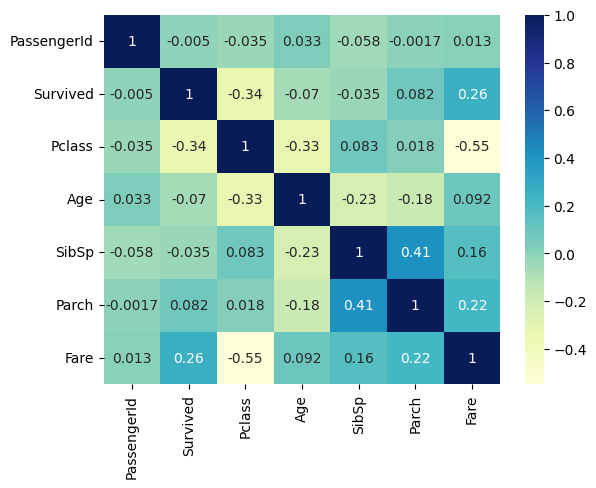

In [12]:
numeric_data = train_set.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)

### Memvisualisasikan peluang selamat berdasarkan gender

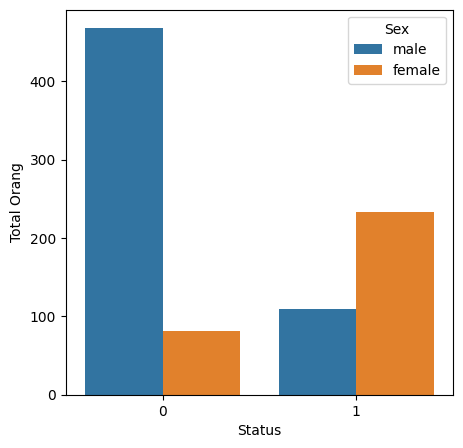

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x='Survived', data=train_set, hue='Sex')
plt.xlabel('Status')
plt.ylabel('Total Orang')
plt.show()

### Memvisualisasikan jumlah penumpang selamat berdasarkan Pclass

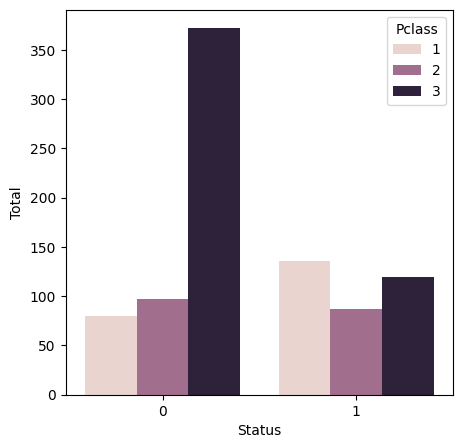

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x='Survived',data=train_set, hue='Pclass')
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

### Memvisualisasi jumlah orang berdasarkan rentang umur

<Axes: ylabel='Frequency'>

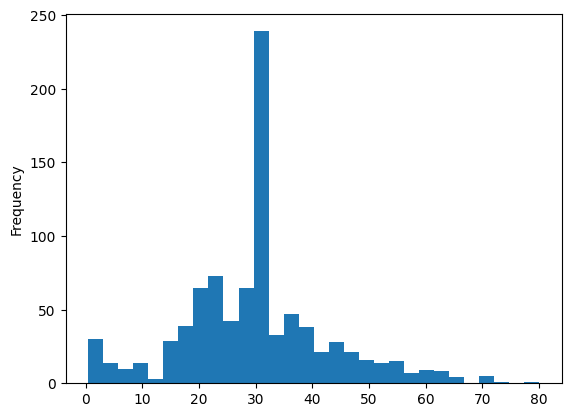

In [15]:
train_set['Age'].plot.hist(bins=30)

### Memvisualisasikan persentasi perbandingan selamat dengan tidak selamat

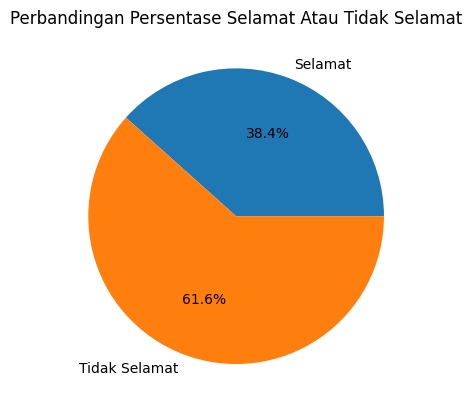

In [ ]:
survived = 0
not_survived = 0

for i in range(len(train_set)):
    if train_set['Survived'][i] == 1:
        survived = survived + 1
    else:
        not_survived = not_survived + 1
        
labels = 'Selamat', 'Tidak Selamat'
total = [survived, not_survived]

fig, ax = plt.subplots()
plt.pie(total, labels=labels, autopct='%1.1f%%')
plt.title('Perbandingan Persentase Selamat Atau Tidak Selamat')
plt.show()

## **Standarisasi Nilai**

In [23]:
std = StandardScaler()
le = LabelEncoder()

train_set['Age'] = std.fit_transform(train_set[['Age']])
train_set['Sex'] = le.fit_transform(train_set['Sex'])

test_set['Age'] = std.fit_transform(test_set[['Age']])
test_set['Sex'] = le.fit_transform(test_set['Sex'])

## **Splitting Train dan Test Data** 

In [ ]:
features = ["Pclass", "Sex", "Age",]
target = ['Survived']
X = pd.get_dummies(train_set[features])
y = pd.get_dummies(train_set[target])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
%pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 478.5 kB/s eta 0:00:0000:0100:09

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(booster = 'gbtree', device='cuda')

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=1
)

grid_search.fit(X, y_train)

[11:58:25] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [56]:
# Best parameters and evaluation
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.8260561170045821


In [50]:
xgb_best_params = XGBClassifier(
                        booster='gbtree',
                        device='cuda', 
                        use_label_encoder=False, 
                        eval_metric='logloss', 
                        random_state=42, 
                        colsample_bytree=0.8,
                        gamma=0,
                        learning_rate=0.2,
                        max_depth=7,
                        n_estimators=50,
                        subsample=0.8
                    )


xgb_best_params.fit(X_train, y_train)

[12:46:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [61]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate on test data
y_pred_train = xgb_best_params.predict(X_train)
y_pred_test = xgb_best_params.predict(X_test)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print("Classification Report Train Set:\n\n",classification_report(y_train, y_pred_train))
print("===========================================================")
print("Classification Report Test Set:\n\n",classification_report(y_test, y_pred_test))

Train Accuracy: 0.8553370786516854
Test Accuracy: 0.8268156424581006
Classification Report Train Set:

               precision    recall  f1-score   support

           0       0.86      0.92      0.89       444
           1       0.85      0.75      0.80       268

    accuracy                           0.86       712
   macro avg       0.85      0.83      0.84       712
weighted avg       0.86      0.86      0.85       712

Classification Report Test Set:

               precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [63]:
X_test_submission = pd.get_dummies(test_set[features])

y_pred_test_submission = xgb_best_params.predict(X_test_submission)

output = pd.DataFrame({'PassengerId': test_set.PassengerId, 'Survived': y_pred_test_submission})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
